importing libraries

In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

Combining the data

In [2]:
# Read all sheets into a dictionary
all_sheets = pd.read_excel("working.xlsx", sheet_name=None)

# Concatenate all sheets into a single DataFrame
merged_data = pd.concat(all_sheets.values(), ignore_index=True)

# Save to a new Excel file
merged_data.to_excel("Merged_Data.xlsx", index=False)


Read the data 

In [3]:
data = pd.read_excel("Merged_Data.xlsx")

Summary of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20066 entries, 0 to 20065
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   District            20066 non-null  object        
 1   PS Name             20066 non-null  object        
 2   FIR No              15572 non-null  object        
 3   Date Report         20066 non-null  datetime64[ns]
 4   Date Accident       20066 non-null  datetime64[ns]
 5   Time Report         20066 non-null  object        
 6   Time Accident       20066 non-null  object        
 7   Sections            20066 non-null  object        
 8   Accident type       20066 non-null  object        
 9   Death               20066 non-null  int64         
 10  Grievous            20066 non-null  int64         
 11  Minor               20066 non-null  int64         
 12  Pedestrian          20066 non-null  int64         
 13  Cyclist             20066 non-null  int64     

Displaying the head rows

In [5]:
data.head()

,District,PS Name,FIR No,Date Report,Date Accident,Time Report,Time Accident,Sections,Accident type,Death,...,Weather,T -Junction,Collision,Type Road,Road Features,Visibility,Traffic Control,Accussed Vehicle,Victim Vehicle,FIR
0,THIRUVANANTHAPURAM CITY,Vattiyoorkavu,7000/2019,2019-01-13,2019-12-01,18:00:00,17:30:00,"279,337,338",Minor Injury,0,...,Sunny/Clear,T- Junction,Hit from Back,National Highway,Straight Road,Good,Uncontrolled,Tipper,Motor Cycle,NaN
1,THIRUVANANTHAPURAM CITY,Vanchiyoor,7001/2019,2019-01-04,2019-12-31,11:25:00,06:30:00,279,Fatal,1,...,Sunny/Clear,Staggered junction,Hit Pedestrian,National Highway,Straight Road,Good,Uncontrolled,Motor Cycle,Motor Cycle,NaN
2,THIRUVANANTHAPURAM CITY,Vanchiyoor,7002/2019,2019-01-02,2019-12-24,17:40:00,08:45:00,MO(Minor),Grevious Injury,0,...,Sunny/Clear,NaN,Hit from Back,State Highway,Straight Road,Good,Uncontrolled,Motor Cycle,Scooter,NaN
3,THIRUVANANTHAPURAM CITY,Vanchiyoor,7003/2019,2019-01-02,2019-01-01,16:13:00,14:15:00,"279,337,338",Grevious Injury,0,...,Sunny/Clear,T- Junction,Hit from Back,Other Road,Curved Road,Good,Uncontrolled,Auto rickshaw,Motor Cycle,NaN
4,THIRUVANANTHAPURAM CITY,Vanchiyoor,7004/2019,2019-01-08,2019-01-17,18:15:00,17:45:00,"279,337,338",Grevious Injury,0,...,Sunny/Clear,NaN,Hit from Side,State Highway,Straight Road,Good,Uncontrolled,Motor Cycle,Car,NaN


Shape of the data

In [6]:
data.shape

(20066, 32)

Checking for null

In [7]:
data.isnull().sum()

District                  0
PS Name                   0
FIR No                 4494
Date Report               0
Date Accident             0
Time Report               0
Time Accident             0
Sections                  0
Accident type             0
Death                     0
Grievous                  0
Minor                     0
Pedestrian                0
Cyclist                   0
Latitude                  0
Longitude                 0
Place of Occurance        0
Type Area                 0
City/Town/ Village        0
Lanes Road                0
Divider                   0
Spot Accident             0
Weather                   0
T -Junction           14596
Collision                 0
Type Road                 0
Road Features             0
Visibility                0
Traffic Control           0
Accussed Vehicle          0
Victim Vehicle            0
FIR                   15572
dtype: int64

We are not using FIR details for our model. filling the T juction with Placeholder unknown

In [8]:
data['T -Junction'] = data['T -Junction'].fillna("Unknown")

Detecting outliers

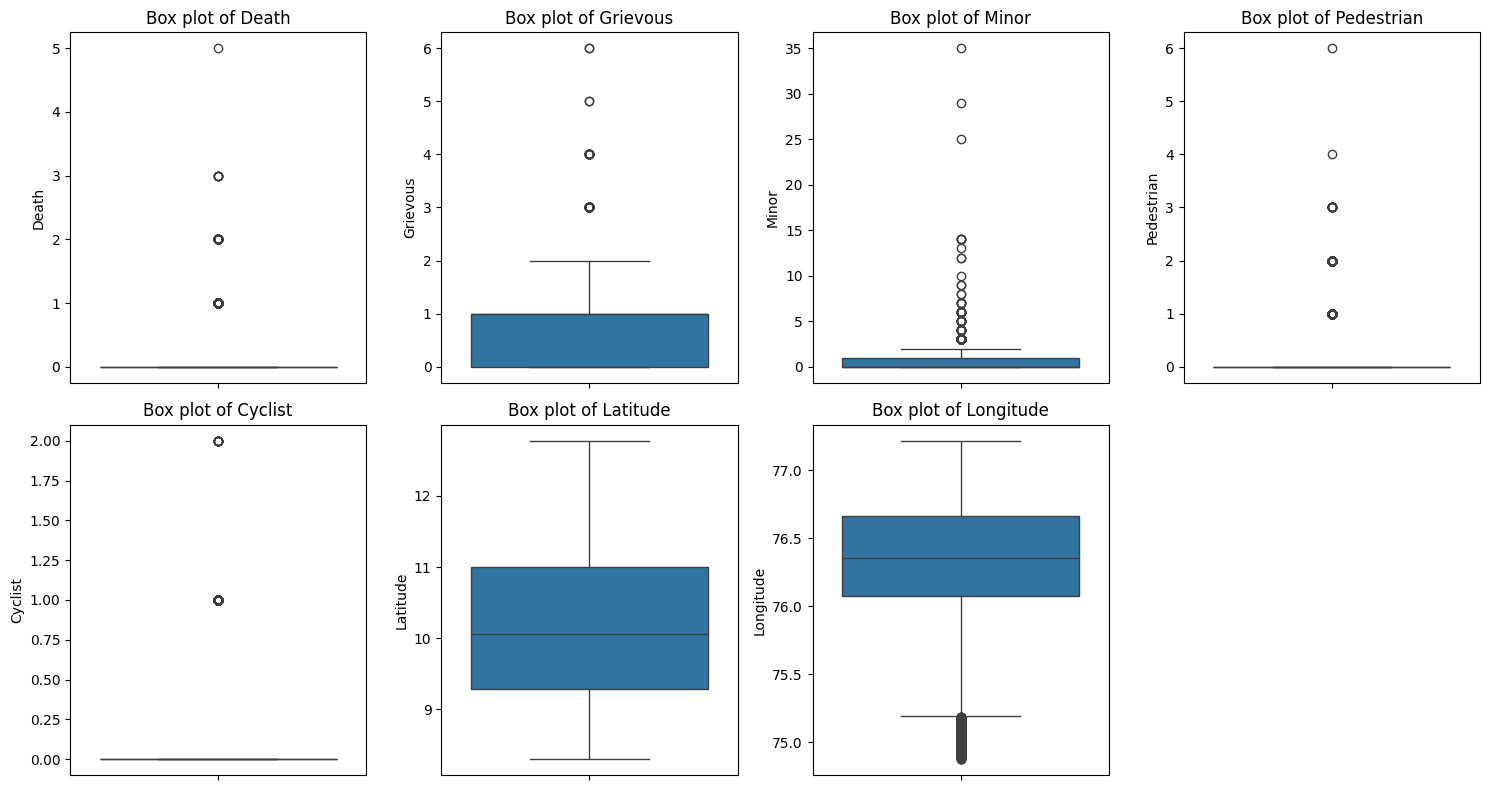

In [9]:
# Plot box plots for numerical columns
numerical_columns = ['Death', 'Grievous', 'Minor', 'Pedestrian', 'Cyclist', 'Latitude', 'Longitude']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data[col])
    plt.title(f"Box plot of {col}")

plt.tight_layout()
plt.show()

On analysing the values of the detected outlier column, it is concluded that they are not real outliers

In [10]:
for col in numerical_columns:
    print(data[col].unique())

[0 1 2 3 5]
[0 1 2 3 4 5 6]
[ 2  0  1  3  4  6  7  5 14 13 12 10  8  9 29 35 25]
[0 1 2 3 4 6]
[0 1 2]
[10.1902   10.107051  9.942077 ... 12.506886 11.986299 12.204597]
[76.2002   76.261841 76.644036 ... 75.040711 75.376123 75.134203]


Converting the Date to Date-time format

In [11]:
data['Month'] = data['Date Accident'].dt.month
data['Day_of_Week'] = data['Date Accident'].dt.dayofweek

One-hot encode categorical features


In [12]:
data = pd.get_dummies(data, columns=['District', 'PS Name', 'Accident type', 'Place of Occurance', 
                                 'Type Area', 'City/Town/ Village', 'Lanes Road', 'Weather', 
                                 'Visibility', 'Traffic Control', 'Accussed Vehicle', 
                                 'Victim Vehicle', 'Type Road', 'Road Features'], drop_first=True)


In [13]:
print(data.columns)


Index(['FIR No', 'Date Report', 'Date Accident', 'Time Report',
       'Time Accident', 'Sections', 'Death', 'Grievous', 'Minor', 'Pedestrian',
       ...
       'Type Road_ODR', 'Type Road_Other Road', 'Type Road_State Highway',
       'Road Features_Culvert', 'Road Features_Curved Road',
       'Road Features_Ongoing Road Works/Under Construction',
       'Road Features_Others', 'Road Features_Pot Holes',
       'Road Features_Steep Grade', 'Road Features_Straight Road'],
      dtype='object', length=7551)


Label Encoding for ordinal values

In [14]:
label_encoder = LabelEncoder()
data['Accident type'] = label_encoder.fit_transform(data['Accident type'])

KeyError: 'Accident type'